In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import socket, struct

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss

In [3]:
filepath = "./kaggleDataset/Dataset-Unicauca-Version2-87Atts.csv"
df = pd.read_csv(filepath)
df.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [4]:
df.tail()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
3577291,10.200.7.199-98.138.79.73-42135-443-6,98.138.79.73,443,10.200.7.199,42135,6,15/05/201705:43:40,2290821,5,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577292,10.200.7.217-98.138.79.73-51546-443-6,98.138.79.73,443,10.200.7.217,51546,6,15/05/201705:46:10,24,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577293,10.200.7.218-98.138.79.73-44366-443-6,98.138.79.73,443,10.200.7.218,44366,6,15/05/201705:45:39,2591653,6,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577294,10.200.7.195-98.138.79.73-52341-443-6,98.138.79.73,443,10.200.7.195,52341,6,15/05/201705:45:59,2622421,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577295,10.200.7.196-98.138.79.73-34188-443-6,98.138.79.73,443,10.200.7.196,34188,6,15/05/201705:46:05,2009138,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL


In [5]:
# Function that changes IP addresses into numbers

def ip2int(ip):
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

In [6]:
# Converting IP addresses into numbers
df['Source.IP'] = df['Source.IP'].apply(ip2int)
df['Destination.IP'] = df['Destination.IP'].apply(ip2int)

In [7]:
# Checking if any value in the dataframe is null
df.isnull().values.any()

False

In [8]:
# Checking types of values
print(df.dtypes)

Flow.ID              object
Source.IP             int64
Source.Port           int64
Destination.IP        int64
Destination.Port      int64
                     ...   
Idle.Max            float64
Idle.Min            float64
Label                object
L7Protocol            int64
ProtocolName         object
Length: 87, dtype: object


In [9]:
# Checking columns that have only one unique value
df.columns[df.nunique() <= 1]

Index(['Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'CWE.Flag.Count',
       'Fwd.Avg.Bytes.Bulk', 'Fwd.Avg.Packets.Bulk', 'Fwd.Avg.Bulk.Rate',
       'Bwd.Avg.Bytes.Bulk', 'Bwd.Avg.Packets.Bulk', 'Bwd.Avg.Bulk.Rate',
       'Label'],
      dtype='object')

In [10]:
# Checking occurance of each application
df['ProtocolName'].value_counts()

GOOGLE          959110
HTTP            683734
HTTP_PROXY      623210
SSL             404883
HTTP_CONNECT    317526
                 ...  
STARCRAFT            3
QQ                   2
99TAXI               1
SOCKS                1
NFS                  1
Name: ProtocolName, Length: 78, dtype: int64

In [11]:
# Features that will be removed from dataset because they have low occurances of records in dataset
feats_toDelete = df['ProtocolName'].value_counts()[-25:].index
feats_toDelete

Index(['H323', 'CNN', 'LASTFM', 'CITRIX', 'ORACLE', 'TEAMSPEAK', 'BGP', 'RTMP',
       'BITTORRENT', 'WHOIS_DAS', 'SKINNY', 'OPENSIGNAL', 'MAIL_IMAPS',
       'OSCAR', 'LOTUS_NOTES', 'SIMET', 'IP_OSPF', 'RADIUS', 'OPENVPN', 'SNMP',
       'STARCRAFT', 'QQ', '99TAXI', 'SOCKS', 'NFS'],
      dtype='object')

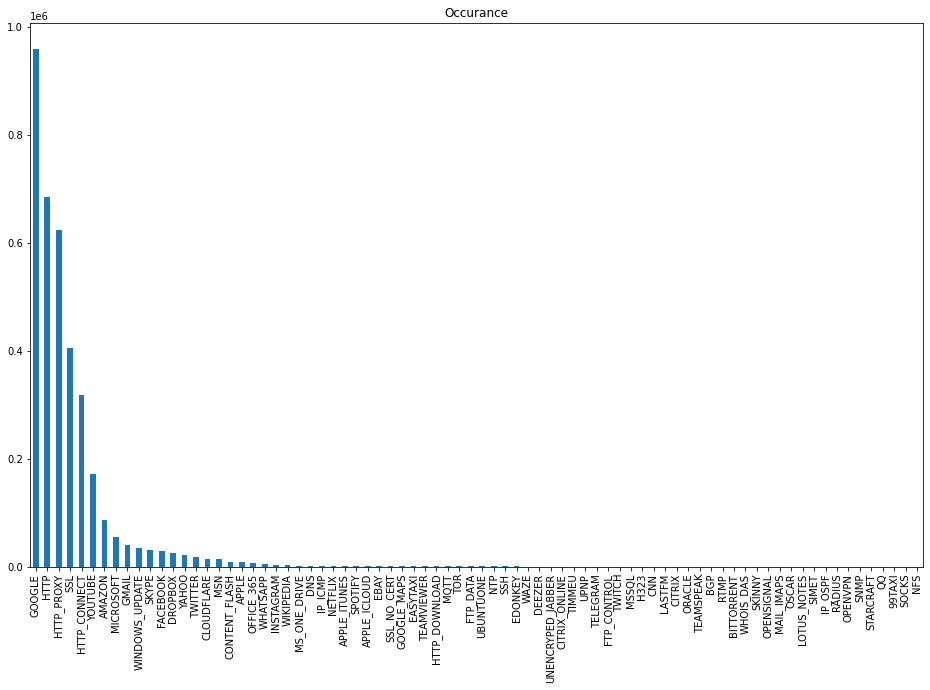

In [12]:
# Plot the number of records for individual applications
target_count = df['ProtocolName'].value_counts()
plt.figure(figsize=(16,10))
target_count.plot(kind='bar', title='Occurance');

In [13]:
# Removal of the applications saved in feats_toDelete var because they occur in a small amount of records and do not have a major impact on the model
df = df[~df.ProtocolName.isin(feats_toDelete)]

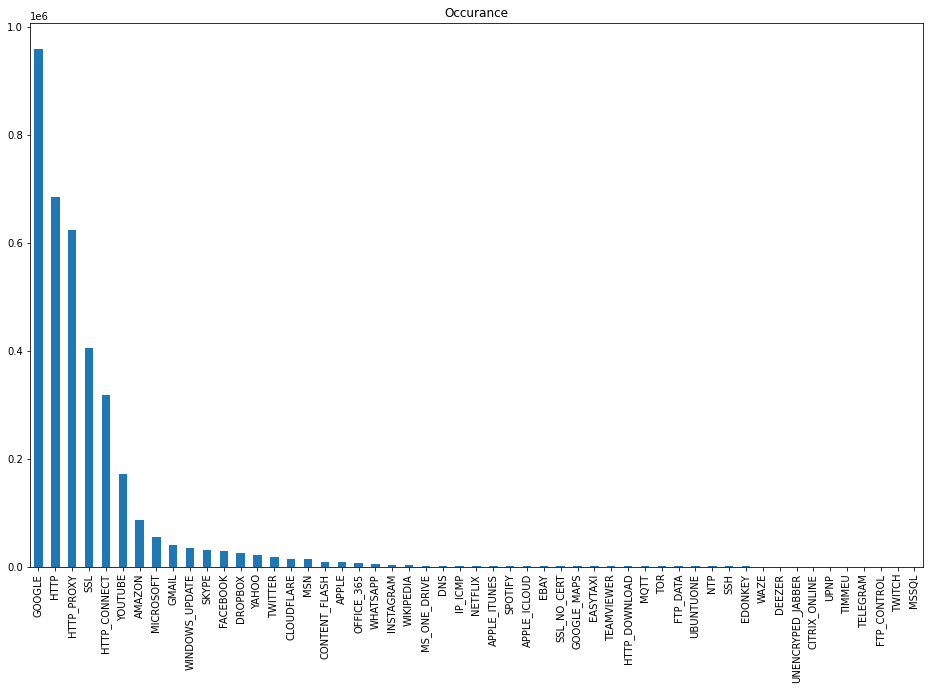

In [14]:
# Plot the number of records for individual applications one more time after some application removal
target_count2 = df['ProtocolName'].value_counts()
plt.figure(figsize=(16,10))
target_count2.plot(kind='bar', title='Occurance');

In [15]:
df.head(6)

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,2886926638,52422,180881159,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,180881159,3128,2886926638,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,840939815,80,180881369,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,840939815,80,180881369,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,3232253995,55961,180881159,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
5,172.19.1.56-10.200.7.6-50004-3128-6,180881158,3128,2886926648,50004,6,26/04/201711:11:17,105069,136,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [16]:
feats = [x for x in df.columns if x != 'Flow.ID' and x != 'Timestamp' and x != 'ProtocolName' and x != 'Label']
print("feats = ", feats)
X = df[feats].astype(float)
Y = df['ProtocolName']

feats =  ['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count', 'A

In [17]:
feats = [x for x in df.columns if x != 'ProtocolName']
X = df[feats].astype(float)
Y = df['ProtocolName']

In [18]:
print(sorted(Counter(Y).items()))

[('AMAZON', 86875), ('APPLE', 7615), ('APPLE_ICLOUD', 1200), ('APPLE_ITUNES', 1287), ('CITRIX_ONLINE', 38), ('CLOUDFLARE', 14737), ('CONTENT_FLASH', 8589), ('DEEZER', 74), ('DNS', 1695), ('DROPBOX', 25102), ('EASYTAXI', 705), ('EBAY', 1192), ('EDONKEY', 95), ('FACEBOOK', 29033), ('FTP_CONTROL', 25), ('FTP_DATA', 251), ('GMAIL', 40260), ('GOOGLE', 959110), ('GOOGLE_MAPS', 807), ('HTTP', 683734), ('HTTP_CONNECT', 317526), ('HTTP_DOWNLOAD', 516), ('HTTP_PROXY', 623210), ('INSTAGRAM', 2415), ('IP_ICMP', 1631), ('MICROSOFT', 54710), ('MQTT', 302), ('MSN', 14478), ('MSSQL', 21), ('MS_ONE_DRIVE', 1748), ('NETFLIX', 1560), ('NTP', 135), ('OFFICE_365', 5941), ('SKYPE', 30657), ('SPOTIFY', 1269), ('SSH', 102), ('SSL', 404883), ('SSL_NO_CERT', 856), ('TEAMVIEWER', 527), ('TELEGRAM', 33), ('TIMMEU', 34), ('TOR', 276), ('TWITCH', 24), ('TWITTER', 18259), ('UBUNTUONE', 249), ('UNENCRYPED_JABBER', 45), ('UPNP', 34), ('WAZE', 79), ('WHATSAPP', 4593), ('WIKIPEDIA', 2025), ('WINDOWS_UPDATE', 34471), ('Y

In [19]:
print(sorted(Counter(Y).items()))

[(0, 86875), (1, 7615), (2, 1200), (3, 1287), (4, 38), (5, 14737), (6, 8589), (7, 74), (8, 1695), (9, 25102), (10, 705), (11, 1192), (12, 95), (13, 29033), (14, 25), (15, 251), (16, 40260), (17, 959110), (18, 807), (19, 683734), (20, 317526), (21, 516), (22, 623210), (23, 2415), (24, 1631), (25, 54710), (26, 302), (27, 14478), (28, 21), (29, 1748), (30, 1560), (31, 135), (32, 5941), (33, 30657), (34, 1269), (35, 102), (36, 404883), (37, 856), (38, 527), (39, 33), (40, 34), (41, 276), (42, 24), (43, 18259), (44, 249), (45, 45), (46, 34), (47, 79), (48, 4593), (49, 2025), (50, 34471), (51, 21268), (52, 170781)]


In [20]:
print(sorted(Counter(encoded_Y).items()))

In [21]:
dict_smote = { "CONTENT_FLASH":       10000,
"APPLE":               10000,
"OFFICE_365":        10000,
"WHATSAPP":            10000,
"INSTAGRAM":          10000,
"WIKIPEDIA":           10000,
"MS_ONE_DRIVE":        10000,
"DNS":                 10000,
"IP_ICMP":             10000,
"NETFLIX":             10000,
"APPLE_ITUNES":        10000,
"SPOTIFY":             10000,
"APPLE_ICLOUD":        10000,
"EBAY":               10000,
"SSL_NO_CERT":          10000,
"GOOGLE_MAPS":          10000,
"EASYTAXI":             10000,
"TEAMVIEWER":           10000,
"HTTP_DOWNLOAD":        10000,
"MQTT":                 10000,
"TOR":                  10000,
"FTP_DATA":             10000,
"UBUNTUONE":            10000,
"NTP":                  10000,
"SSH": 10000}
print(dict_smote)

{'CONTENT_FLASH': 10000, 'APPLE': 10000, 'OFFICE_365': 10000, 'WHATSAPP': 10000, 'INSTAGRAM': 10000, 'WIKIPEDIA': 10000, 'MS_ONE_DRIVE': 10000, 'DNS': 10000, 'IP_ICMP': 10000, 'NETFLIX': 10000, 'APPLE_ITUNES': 10000, 'SPOTIFY': 10000, 'APPLE_ICLOUD': 10000, 'EBAY': 10000, 'SSL_NO_CERT': 10000, 'GOOGLE_MAPS': 10000, 'EASYTAXI': 10000, 'TEAMVIEWER': 10000, 'HTTP_DOWNLOAD': 10000, 'MQTT': 10000, 'TOR': 10000, 'FTP_DATA': 10000, 'UBUNTUONE': 10000, 'NTP': 10000, 'SSH': 10000}


In [22]:
dict_smote = { "CONTENT_FLASH":       10000,
"APPLE":               10000,
"OFFICE_365":        10000,
"WHATSAPP":            10000,
"INSTAGRAM":          10000,
"WIKIPEDIA":           10000,
"MS_ONE_DRIVE":        10000,
"DNS":                 10000,
"IP_ICMP":             10000,
"NETFLIX":             10000,
"APPLE_ITUNES":        10000,
"SPOTIFY":             10000,
"APPLE_ICLOUD":        10000,
"EBAY":               10000,
"SSL_NO_CERT":          10000,
"GOOGLE_MAPS":          10000,
"EASYTAXI":             10000,
"TEAMVIEWER":           10000,
"HTTP_DOWNLOAD":        10000,
"MQTT":                 10000,
"TOR":                  10000,
"FTP_DATA":             10000,
"UBUNTUONE":            10000,
"NTP":                  10000,
"SSH": 10000}
print(dict_smote2)

In [23]:
# getting rid of the problem of unbalanced data set
pipe = make_pipeline(
    SMOTE(sampling_strategy=dict_smote),
    NearMiss(sampling_strategy=dict_nearMiss)
)

In [24]:
X_resampled, y_resampled = pipe.fit_resample(X, Y)

Shape pierwotnego pliku (3577082, 87)
Shape X (3577082, 83)
Shape X_resampled(420502, 83)
Shape Y (3577082,)
Shape y_resampled(420502,)


In [25]:
print("Shape pierwotnego pliku " + str(df.shape))
print("Shape X " + str(X.shape))
print("Shape X_resampled" + str(X_resampled.shape))
print("Shape Y " + str(Y.shape))
print("Shape y_resampled" + str(y_resampled.shape))

In [26]:
# creating new dataset
new_dataframe = pd.DataFrame(data = X_resampled, columns = feats) 

In [27]:
new_dataframe['ProtocolName'] = y_resampled

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol
count,4.205020e+05,420502.000000,4.205020e+05,420502.000000,420502.000000,4.205020e+05,420502.000000,420502.000000,4.205020e+05,4.205020e+05,...,420502.000000,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,420502.000000
mean,1.812212e+09,39953.364173,9.685472e+08,5163.986002,6.357677,1.762367e+07,114.294596,96.700748,7.058028e+04,5.039536e+04,...,25.591668,4.450160e+05,1.341136e+05,6.041940e+05,3.434591e+05,5.647714e+06,5.349414e+05,6.125477e+06,5.210328e+06,131.658879
std,1.504682e+09,20764.624290,1.196351e+09,12244.135662,2.495837,3.394483e+07,1157.310622,982.584467,1.349536e+06,1.436231e+06,...,7.103007,3.676330e+06,1.380311e+06,4.439932e+06,3.448174e+06,1.517531e+07,2.981080e+06,1.608557e+07,1.466686e+07,57.893323
min,9.053086e+07,0.000000,9.053086e+07,0.000000,0.000000,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,...,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,1.808814e+08,35945.000000,1.808812e+08,443.000000,6.000000,5.830000e+02,2.000000,1.000000,6.000000e+00,0.000000e+00,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,92.000000
50%,3.003188e+09,49707.153061,1.808812e+08,3128.000000,6.000000,1.881861e+05,4.416784,4.000000,2.003032e+02,1.440000e+02,...,28.155794,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,133.000000
75%,3.232255e+09,53514.000000,1.746164e+09,3128.000000,6.000000,1.207923e+07,11.000000,11.947477,1.292840e+03,3.917000e+03,...,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,175.000000
max,3.632868e+09,65534.000000,3.650231e+09,65462.000000,17.000000,1.200000e+08,233033.000000,134496.000000,1.607666e+08,3.259112e+08,...,48.000000,1.115558e+08,6.899167e+07,1.115558e+08,1.115558e+08,1.200000e+08,6.988814e+07,1.200000e+08,1.200000e+08,222.000000


In [28]:
new_dataframe.describe()

In [ ]:
new_dataframe.to_csv('KaggleImbalanced.csv', index=False)